In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode(connected = True)

In [ ]:
df_21 = pd.read_csv('../input/kaggle-survey-2021/kaggle_survey_2021_responses.csv',low_memory=False)
questions = df_21.iloc[0, :].T
df_21 = df_21.iloc[1:, :]

In [ ]:
# converting gender into Man, Woman & ETC
df_21['Q2'] = df_21['Q2'].apply(lambda x : 'ETC' if x not in ['Man', 'Woman'] else x)

# Replacing some country names
df_21['Q3'] = df_21['Q3'].replace(['United States of America','United Kingdom of Great Britain and Northern Ireland'], ['USA','UK & NI'])

df_21 = df_21.replace('Jupyter (JupyterLab, Jupyter Notebooks, etc) ', 'Jupyter')

df_21 = df_21.replace(['A laptop', 'A personal computer / desktop',
       'A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)',
       'A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)'],['Laptop', 'Personal Computer',
       'Cloud Platform', 'Deep Learning Workstation'])

df_21 = df_21.replace([ 'Gradient Boosting Machines (xgboost, lightgbm, etc)', 'Dense Neural Networks (MLPs, etc)', 
                       'Transformer Networks (BERT, gpt-3, etc)'], ['Gradient Boosting','Dense NN','Transformer'])

df_21 = df_21.replace(['Word embeddings/vectors (GLoVe, fastText, word2vec)', 'Contextualized embeddings (ELMo, CoVe)',
                       'Encoder-decorder models (seq2seq, vanilla transformers)',
                       'Transformer language models (GPT-3, BERT, XLnet, etc)'], 
                      ['Word Embeddings','Contextualized Embeddings','Encoder-Decorder Models',' Transformer language Models'])

df_21 = df_21.replace(['General purpose image/video tools (PIL, cv2, skimage, etc)','Image segmentation methods (U-Net, Mask R-CNN, etc)',
                      'Object detection methods (YOLOv3, RetinaNet, etc)', 'Generative Networks (GAN, VAE, etc)',
                       'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)'],
                      ['Image/Video Tools','Image Segmentation Methods','Object Detection Methods', 'Generative Network',
                       'Image Classification & Other General Networks'])

df_21 = df_21.replace(['Manufacturing/Fabrication', 'Academics/Education', 'Computers/Technology', 'Other', 
                       'Shipping/Transportation', 'Energy/Mining', 'Insurance/Risk Assessment', 'Non-profit/Service',
                       'Accounting/Finance', 'Hospitality/Entertainment/Sports', 'Government/Public Service',
                       'Online Service/Internet-based Services', 'Online Business/Internet-based Sales',
                       'Medical/Pharmaceutical', 'Retail/Sales', 'Broadcasting/Communications', 'Marketing/CRM',
                       'Military/Security/Defense'], ['Manufacturing', 'Academics', 'Technology', 'Other', 
                       'Transportation', 'Energy', 'Insurance', 'Non-profit', 'Finance', 'Entertainment', 'Government', 
                       'Online Service',  'Online Business', 'Medical', 'Retail', 'Communications', 'Marketing',
                       'Military'])

df_21 = df_21.replace(['1000-9,999 employees','10,000 or more employees','50-249 employees','0-49 employees',
                       '250-999 employees'], ['1000-9,999  ','10,000+  ','50-249  ','0-49  ','250-999  ']) 

In [ ]:
# containing data related to DS Field
df_data = df_21[(df_21['Q5']!='Student')&(df_21['Q5']!='Currently not employed')&(df_21['Q5']!='Developer Relations/Advocacy')]

# for the analysis i am only taking data that contains response from Students, DS, ML & RS
df1 = df_21[df_21.Q5.isin(['Student','Data Scientist','Machine Learning Engineer','Research Scientist'])]

# for the analysis i am only taking data that contains response from DS, ML & RS
df_ns = df_21[df_21.Q5.isin(['Data Scientist','Machine Learning Engineer','Research Scientist'])]

<h1> <span style="font-size:35px; color:#496595"><strong>2021 Kaggle Survey</strong></span> </h1>
<br>

<h3> <span style="color:#496595"> Introduction </span> </h3><br>
Many of you have heard or read articles about the buzz created by Data Science, Machine Learning. As Clive Humby states <span style="color:#496595"><b>"Data is the new oil"</b></span> It’s valuable, but if unrefined it cannot really be used. It has to be changed into gas, plastic, chemicals, etc to create a valuable entity that drives profitable activity; so, must data be broken down, analysed for it to have value. And In 2011, the senior vice-president of Gartner, Peter Sondergaard, took this concept even further by stating <span style="color:#496595"><b>"Information is the oil of the 21st century, and analytics is the combustion engine"</b></span> 

<br>

This is the <span style="color:#496595"><b>5th year</b></span> conducting an in-depth user survey & publicly sharing the results. Over <span style="color:#496595"><b>25,000+</b></span> data scientists and ML engineers submitted responses on their backgrounds and day to day experience – everything from educational details to salaries to preferred technologies and techniques.<br><br>
This notebook is divided into several parts here I am going to compared how students, Data scientist, Machine Learning engineer and Research Scientist work and will try to find out the common things they usually do. So, the students can start shifting their focus on those topics and get a step forward to be successful<br>

I will try to make Quality charts rather than bombarding charts with any other information that's is necessary.


<h2><span style="font-size:35px; color:#496595">General Overview</span></h2>
<br> 
1. Kaggle Summary<br>
2. Gender Ratio over the Time period<br>
3. How common is data related field?<br>
4. Response Ratio<br>

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=[0.5, 2.4],
    y=[1.6, 1.6],
    mode="text", 
    text=["<span style='font-size:33px'><b>42</b></span>", 
          "<span style='font-size:33px'><b>25973</b></span>"],
    textposition="bottom center"
))
fig.add_trace(go.Scatter(
    x=[0.5, 2.4],
    y=[1.1, 1.1],
    mode="text", 
    text=["Questions", "Responses"],
    textposition="bottom center"
))
fig.add_hline(y=2.2, line_width=5, line_color='gray')
fig.add_hline(y=0.3, line_width=3, line_color='gray')
fig.update_yaxes(visible=False)
fig.update_xaxes(visible=False)
fig.update_layout(height=300, width=700, hovermode=False, showlegend=False,
                  title="Kaggle Survey Summary", title_x=0.5, title_y=0.9,
                  xaxis_range=[-0.5,3.6], yaxis_range=[-0.2,2.2],                 
                  margin=dict(t=90, b=0, l=70, r=70),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=35, color='#8a8d93'),
                  font=dict(size=23, color='#8a8d93'),
                 )

<h3><span style="font-size:35px; color:#496595">General Ratio ♀️♂️</span></h3>

In [ ]:
fig = make_subplots(1, 3, horizontal_spacing=0, vertical_spacing=0)                    
y=[2, 2]
x=[1, 1.01]

fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='2019',
                         marker=dict(size=[80, 130], color=[2, '#496595'])), 1,1)
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='2020',
                         marker=dict(size=[105, 120], color=[2, '#496595'])), 1,2)
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='2021', 
                         marker=dict(size=[90, 120], color=[2, '#496595'])), 1,3)

# annotation
fig.add_trace(go.Scatter(x=x, y=y, showlegend=False, mode="text",
                         text=["<b>Woman</b><br> 16.3%","<b>Man</b><br> 81.8%"]
                        ), 1,1)
fig.add_trace(go.Scatter(x=x, y=y, showlegend=False, mode="text",
                         text=["<b>Woman</b><br> 19.4%","<b>Man</b><br> 78.8%"]), 1,2)
fig.add_trace(go.Scatter(x=x, y=y, showlegend=False, mode="text",
                         text=["<b>Woman</b><br> 18.8%","<b>Man</b><br> 79.3%"]), 1,3)

fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=300, hovermode=False, showlegend=False,
                  title="<span style='font-size:45px; font-family:Times New Roman'>Gender Ratio over the time period</span>",
                  margin=dict(t=110, b=40, l=50, r=50),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93'),
                  font=dict(size=15, color='#C5C5C5'),
                 )
fig.add_annotation(dict(x=0.15, y=-0.02, ax=0, ay=0,
                    xref = "paper", yref = "paper",
                    text= "2019"
                  ))
fig.add_annotation(dict(x=0.5, y=-0.02, ax=0, ay=0,
                    xref = "paper", yref = "paper",
                    text= "2020"
                  ))
fig.add_annotation(dict(x=0.81, y=-0.02, ax=0, ay=0,
                    xref = "paper", yref = "paper",
                    text= "2021"
                  ))

fig.show()

Out Of the <b><span style="color:#496595">25,973</span></b> survey participants, only <b><span style="color:#496595">18.8%</span></b> of respondents in the dataset were <b><span style="color:#496595">Women</span></b>. We cannot state that only 18.8% of the data science community is female. Still, the lack of participation on the part of women is cause for great concern.

<h3><span style="font-size:29px; color:#496595">How common is data and data related field</span></h3>

In [ ]:
# data
df_q5 = df_data['Q5'].value_counts().reset_index()
df_q5['per'] = ((df_q5['Q5'] / df_q5['Q5'].sum())*100).round(2).astype(str) + '%'

# chart
fig = px.bar(df_q5, y='index', x='Q5', text='per', color='per', 
             color_discrete_sequence=['#334668','#334668','#334668','#91A2BF','#91A2BF','#91A2BF','#91A2BF',
                                     '#91A2BF','#91A2BF','#91A2BF','#91A2BF','#91A2BF']
            )
# styling
fig.update_xaxes(visible=False)
fig.update_yaxes(categoryorder='total ascending', ticksuffix='  ')
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=450, yaxis_title='', hovermode='y unified', showlegend=False,
                  title="<span style='font-size:45px; font-family:Times New Roman'>How common is Data Oriented Jobs?</span>",
                  margin=dict(t=90, b=40, l=0, r=0),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'))
fig.show()

Unsurprisingly people work more in Data Scientist filed rather than Software Engineer. Nowadays many peoples from younger age are showing their interest in Data Science field well that’s a good start.<br>
The second most similar work in data is done by Software Engineer followed by Data Analyst, Research Scientist and Machine Learning Engineer.

In [ ]:
# Circlify library is not working on kaggle u may run this code in jupyter NB
# pip import circlify

'''# import the circlify library (Code is hidden)
import circlify
import matplotlib.pyplot as plt

Q5 = df1['Q5'].value_counts().tolist()
Q5_labels = ["ML Engineer\n11.1%",'Research\n Scientist\n11.4%','Data Scientist\n26.9%','Student\n50.6%']

# compute circle positions:
circles = circlify.circlify(
    Q5, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=4)
)

fig, ax = plt.subplots(figsize=(9,9))
#fig.patch.set_facecolor('#333')
#ax.set_facecolor('#333')
ax.axis('off')

# Find axis boundaries
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = Q5_labels
# print circles
for circle, label in zip(circles, labels):
    x, y, r = circle
    if label in ['Data Scientist\n26.9%','Student\n50.6%']:
        ax.add_patch(plt.Circle((x, y), r*0.95, alpha=0.6, facecolor="#334668", edgecolor="#334668"))
        plt.annotate(label, (x,y ) ,va='center', ha='center',  fontsize=17, color='#333')
    else:
        ax.add_patch(plt.Circle((x, y), r*0.95, alpha=0.5, facecolor='#6D83AA', edgecolor='#6D83AA'))
        plt.annotate(label, (x,y ) ,va='center', ha='center',  fontsize=14, color='#444')

plt.title("Response Ratio",fontsize=45, color='#333')
plt.show()'''

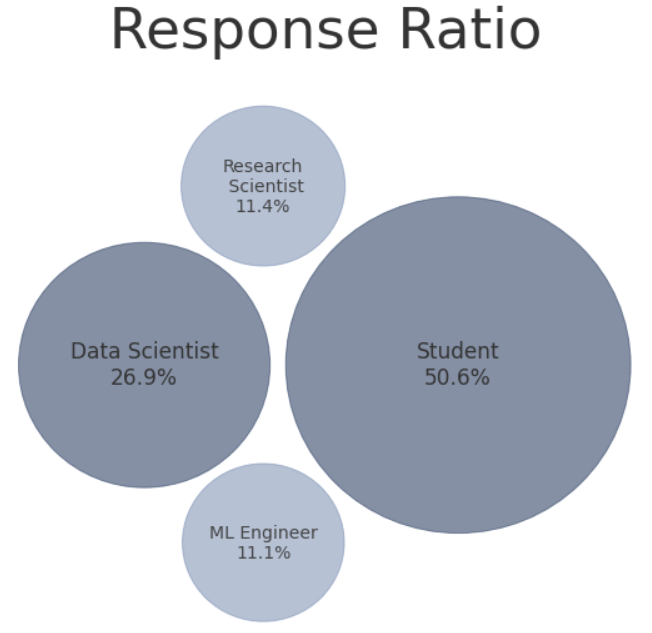

<h2> <span style="font-size:35px; color:#496595;">2. Demographics </span> </h2>
<br>

<h3> <span style="font-size:35px; color:#496595;">2.1 Age is just a Number! </span></h3>
Age is just a Number we can start learning at any age. By looking at the hype of Data Science being labelled as a high wage source jobs well I expect a significant participation of youth. With the all hype around data and data related jobs I expect a high demand and their interest in Kaggle.

In [ ]:
df_ns['Counter']=1
df_q1_5 = df_ns.groupby(['Q5','Q1'])['Counter'].sum().reset_index()
fig = px.histogram(df_q1_5, x='Q1', y='Counter', color='Q5',
                   color_discrete_sequence=['#334668','#496595','#6D83AA'])
fig.update_yaxes(visible=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=400, xaxis_title='', hovermode='x unified', 
                  title="<span style='font-size:50px; font-family:Times New Roman'>Age is just a Number</span>",
                  margin=dict(t=110, b=40, l=110, r=110),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.85, y=0.6,
                              bordercolor="#fff", borderwidth=0.5, font_size=13)
)
fig.add_annotation(dict(x=-0.09,y=1.17,  align='left', xref = "paper", yref = "paper", showarrow = False, font_size=13,
                        text="<span style='size:16px'>Students in their early age of education are in age group 18-25 </span>"))
fig.show()

Here I found something interesting facts, if you notice younger people are getting more familiar with the Data Science and taking participate in the process. <b><span style="color:#496595">That's a good start!</span></b>
Looking further most of the Data Scientists are in there 20's and go upto half 30's.<br>
Highest number of Research Scientists are in 30-34 Age which is followed by 25-29.

<h3 style="font-size:35px; color:#496595;">2.2 Gender Ratio </h3><br>

Well we saw the <b><span style="color:#496595">Man: Woman</span></b> ratio is <b><span style="color:#496595">80%:20%</span></b> but can woman have higher interest in Machine Learning domain. Let's find out. 

In [ ]:
# data
df1['Counter']=1
df_52 = df1.groupby(["Q5","Q2"])['Counter'].count()
df_52 = df_52.reset_index()
df_52 = df_52[df_52['Q2']!='ETC']

# chart
fig = px.treemap(df_52, path=['Q2','Q5'],values='Counter', color_discrete_sequence=['#496595','#f36196'])
fig.update_layout(height=350, title_y=0.85,
                  title="<span style='font-size:50px; font-family:Times New Roman'>Gender Ratio</span>",
                  margin=dict(t=90, b=30, l=30, r=30),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Times New Roman"),
                  font=dict(size=13, color='#8a8d93'))
fig.show()

Looks like <b><span style="color:#496595">Machine Learning</span></b> domain is ruled by <b><span style="color:#496595">Man</span></b> with <b><span style="color:#496595">64%</span></b>. Most of the <b><span style="color:#496595">woman’s</span></b> are in <b><span style="color:#496595">Research domain</span></b> compared to others domains.

<h3><span style="font-size:35px; color:#496595;">2.3 Level of Education</span> </h3>

<b><span style="color:#496595">Highest Level of Education</span></b> is a hot topic people generally believe that higher the education <b><span style="color:#496595">you can earn more</span></b>. Some believe having a master’s degree is necessary to go in <b><span style="color:#496595">MANG</span></b>. Let's have a look what the number says.

In [ ]:
# data
df1['Counter']=1
df_42 = df_ns.groupby(["Q5","Q4"])['Counter'].count()
df_42 = df_42.reset_index()

# chart
fig = px.histogram(df_42, y='Q4', color='Q5', x='Counter', histnorm='percent',
                  color_discrete_sequence=['#334668','#496595','#6D83AA','#91A2BF'])
fig.update_traces(hovertemplate=None)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(tickmode = 'array', 
                 tickvals=["Some college/university study without earning a bachelor’s degree", "Professional doctorate",
                          "No formal education past high school", "Master’s degree", "I prefer not to answer",
                          "Bachelor’s degree", 'Doctoral degree'],
                 ticktext=["Without Bachelor's  <br>  Degree  ", "Professional doctorate  ",
                           "No formal education  <br> past high school  ", "Master’s degree  ", "Prefer not to answer  ",
                           "Bachelor’s degree  ", "Doctoral degree  "])
fig.update_layout(height=470, yaxis_title='', xaxis_title='', barnorm='percent',
                  title="<span style='font-size:50px; font-family:Times New Roman'>Highest Level of Education</span>",
                  #<br>have attained or plan to attain within the next 2 Y",
                  title_y=0.85, bargap=0.3,
                  margin=dict(t=170, b=40, l=30, r=30),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Times New Roman"),
                  font=dict(color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.8, y=1.2, 
                              bordercolor="#fff", borderwidth=0.5, font_size=13))
fig.add_annotation(dict(
        x=-0.17,
        y=1.24,
        text= "Majority of people have Master's degree with <b>39%,</b> Bachelor's degree with <b>38%</b>", 
        xref = "paper",
        yref = "paper",
        showarrow = False
        
))
fig.add_annotation(dict(
        x=-0.17,
        y=1.18,
        text= "& Doctoral degree with <b>11%</b>",
        xref = "paper",
        yref = "paper",
        showarrow = False
        
))
fig.show()

In the coming years we will have a <b><span style="color:#496595">great growth in master’s domain</span></b> as most of the audience are having master’s degree or planning for their master’s degree, well that includes me too. For now, we have a majority of people having higher degrees.<br>
Most of the Data scientist have a Master's degree and Bachelor's degree. Most of the Research scientist have a doctorate degree as expected.<br>
Most of the students are without an Bachelor's degree.

<h3><span style="font-size:32px; color:#496595;">2.4 Which Country have highest Influence of DS, ML & RS </span> </h3>

In [ ]:
df1 = df1[df1['Q3']!='Other']

df_c = pd.crosstab(df1['Q5'], df1['Q3'], margins=True).T.sort_values(by='All', ascending=False)[:11].iloc[1: , :].reset_index()
df_c=df_c.sort_values(by='All', ascending=True)

fig = make_subplots(rows=1, cols=2, column_widths=[0.4,0.6], shared_yaxes=True, horizontal_spacing=0)
fig.append_trace(go.Bar(x=df_c['Research Scientist'], y=df_c.Q3, orientation='h', showlegend=True, 
                        text=df_c['Research Scientist'], name='Research Scientist', marker_color='#6D83AA'), 1, 1)
fig.append_trace(go.Bar(x=df_c['Data Scientist'], y=df_c.Q3, orientation='h', showlegend=True, 
                        text=df_c['Data Scientist'], name='Data Scientist', marker_color='#334668'), 1, 2)
fig.append_trace(go.Bar(x=-df_c['Machine Learning Engineer'], y=df_c.Q3, orientation='h', showlegend=True, 
                        text=df_c['Machine Learning Engineer'], name='Machine Learning Engineer', marker_color='#496595'), 1, 2)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(ticksuffix='  ')
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)),
                  textposition='auto')
fig.update_layout(height=500, barmode='overlay', 
                  title="<span style='font-size:50px; font-family:Times New Roman'>Top 10 Country</span>",
                  margin=dict(t=110, b=40, l=120, r=40),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.83, y=1.05,
                              bordercolor="#fff", borderwidth=0.5, font_size=13))
fig.show()

Research Scientist are from India, USA and Japan.<br>
<b><span style="color:#496595">Top 3 country</span></b> having <b><span style="color:#496595">highest Data Scientist</span></b> are from India, USA and Brazil.<br>
    <b><span style="color:#496595">Top 3 country</span></b> having <b><span style="color:#496595">highest Machine Learning Engineers</span></b> are from India, USA and China.

India and USA audience are participating more in the survey so let's remove them and see which other top 10 countries participate.

In [ ]:
df1_copy = df1.copy()
df1_copy = df1_copy[(df1_copy['Q3']!='Other')&(df1_copy['Q3']!='India')&(df1_copy['Q3']!='USA')]

df_c = pd.crosstab(df1_copy['Q5'], df1_copy['Q3'], margins=True).T.sort_values(by='All', ascending=False)[:11].iloc[1: , :].reset_index()
df_c=df_c.sort_values(by='All', ascending=True)

fig = make_subplots(rows=1, cols=2, column_widths=[0.4,0.6], shared_yaxes=True, horizontal_spacing=0)
fig.append_trace(go.Bar(x=df_c['Research Scientist'], y=df_c.Q3, orientation='h', showlegend=True, 
                        text=df_c['Research Scientist'], name='Research Scientist', marker_color='#6D83AA'), 1, 1)
fig.append_trace(go.Bar(x=df_c['Data Scientist'], y=df_c.Q3, orientation='h', showlegend=True, 
                        text=df_c['Data Scientist'], name='Data Scientist', marker_color='#334668'), 1, 2)
fig.append_trace(go.Bar(x=-df_c['Machine Learning Engineer'], y=df_c.Q3, orientation='h', showlegend=True, 
                        text=df_c['Machine Learning Engineer'], name='Machine Learning Engineer', marker_color='#496595'), 1, 2)
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(ticksuffix='  ')
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)),
                  textposition='auto')
fig.update_layout(height=500, barmode='overlay', 
                  title="<span style='font-size:50px; font-family:Times New Roman'>Top 10 Country</span>",
                  margin=dict(t=110, b=40, l=120, r=40),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.83, y=1.05,
                              bordercolor="#fff", borderwidth=0.5, font_size=13))
fig.show()

<h3><span style="color:#496595">Summary</span></h3>
Looks like students are participating more in the survey compared to other data professionals. While age is just a number the people having age 25-29 are showing more interest in the survey.<br>
The number of respondents is in the ratio 80:20 for Men:Women which is a serious problem and it is found that men are more from Machine Learning background and females are from Research background.<br>
In the upcoming era there will be more students in the Master’s degree as they are planning to do in the next 2 years. Most of the Data Scientist have Master’s degree and Machine Learning Engineer have bachelor’s degree and Research Scientist have Doctorate degree as expected.<br>
India and USA are the highest country having data professionals while India, USA and Japan have the highest Research Scientist while India, USA, China has the highest ML and India, USA, Brazil has the most DS<br>

<h2><span style="font-size:35px; color:#496595;">3. Taking a closer look </span> </h2>

Taking a closer look and finding more insights.
1. How many Years of Experience
2. Top 10 countries having DS and their experience
3. Most Used Language
4. Recommend a Language and Visualization for students
5. Environments and IDE's
6. Secret Ingredient’s

<h3><span style="font-size:35px; color:#496595;">3.1 How Many Years of Experience </span> </h3>

Most of the Data Scientist and Machine Learning Engineer have experience in between 1-3 years and Resarch scienitst have experience 5-10 years.

In [ ]:
df_56 = df_ns.groupby(["Q5","Q6"]).agg({'Counter': 'sum'})
demo = df_56.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
demo['Counter'] = round(demo['Counter'],2)
demo = demo.replace('I have never written code','never code')


fig = px.scatter(demo, y='Q6', color='Counter', x='Q5', size='Counter',
                 color_discrete_sequence=px.colors.sequential.swatches_continuous())
fig.update_yaxes(showgrid=False, zeroline=False, ticksuffix='   ', categoryorder='array',
                 categoryarray=['20+ years',  '10-20 years', '5-10 years',  '3-5 years', 
                                '1-3 years', '< 1 years', 'never code'])
fig.update_xaxes(showgrid=False)
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(height=400, xaxis_title='', yaxis_title='', 
                  title="<span style='font-size:45px; font-family:Times New Roman'>How Many Years Of Coding?</span><br>The chart shows the value in percentage",
                  margin=dict(t=110, b=30, l=270, r=270),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=17, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'))
fig.show()

In [ ]:
df_ds = df1[df1['Q5']=='Data Scientist']
df_exp = df_ds.value_counts(['Q6','Q5']).reset_index()
df_exp = df_exp.loc(axis=0)[6,3,0,1,2,4,5].reset_index()


fig = px.scatter(df_exp, y='Q6', x=0, color='Q5')
for i in range(0, len(df_exp)):
    fig.add_shape(type='line',
                              y0 = df_exp['Q6'][i],
                              x0 = i,
                              x1 = df_exp[0][i],
                              y1 = i,
                              line=dict(color='#656565', width = 2))
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(ticksuffix='  ', showgrid=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)),marker_color='#56627d', marker_size=32)
fig.update_layout(height=350, xaxis_title='', yaxis_title='', title_y=0.45,
                  title="<span style='font-size:35px; font-family:Times New Roman'>How Many Years of Programming Experience: DS</span>",
                  margin=dict(t=80, b=30, l=120, r=40),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.83, y=0.8,
                              bordercolor="#fff", borderwidth=0.5, font_size=13))
fig.show()

Looks like most of the <b><span style="color:#496595">Data Scientist</span></b> have just started their journey as we have <b><span style="color:#496595">28%</span></b> response from data scientist having <b><span style="color:#496595">experience from 1-3 Years</span></b>.<br>
We look the above graph which represent the years of experience in data science domain but let's see the top 10 countries having data scientist and see which country has the highest experienced data scientist.

In [ ]:
# chart
#1. Bar chart: Tells the highest responses from top 10 countries having Data Scientist
#2. Scatter chart: Top 10 country DS & finding out the highest experinece which country has 


# (1 bar chart)
df_c = df_ds['Q3'].value_counts().reset_index()[:10]
# (2 scatter chart)
df_ds_c = pd.crosstab(df_ds['Q3'], df_ds['Q6'], margins=True, margins_name="Total").sort_values(by='Total', ascending=False).reset_index()
df_ds_c = df_ds_c.iloc[1:, :-1][:10] 

# chart
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, horizontal_spacing=0.01, vertical_spacing=0.04)                    
fig.add_trace(go.Bar(x=df_c['index'], y=df_c['Q3'], marker_color='#56627d', name='Data Scientist', 
                     text = df_c['Q3'], textposition = "inside",
                     ), row=1, col=1)
fig.add_trace(go.Scatter(x=df_ds_c['Q3'], y=[-53,-43,-30,-27,-20,-25,-37,-21,-20,-15],
                         text=[53,43,30,27,20,25,37,21,20,15], textposition = "top center",
                         mode='markers', showlegend=False, name="Experience",      
    marker=dict(size=[130,90,60,50,45,47,75,40,35,30], 
                color=['#56627d','#c6ccd8','#334668','#56627d','#c6ccd8',
                       '#334668','#56627d','#56627d','#56627d','#334668']
)), row=2, col=1)

list1={0:'-11', 1:'-15', 2:'-20', 3:'-16', 4:'-27', 5:'-15', 6:'-22', 7:'-19',8:'-31', 9:'-36'}
for key,value in list1.items():
    fig.add_shape(type='line', x0=key, y0=-1, x1=key, y1=value,
            line=dict(color='#c6ccd8', width = 2), row=2, col=1)

# styling
fig.update_xaxes(visible=False, categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(showgrid=False, mirror="allticks", side='top',  row=2, col=1)
fig.update_yaxes(visible=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=750, width=750, hovermode='x unified',
                  title="<span style='font-size:50px; font-family:Times New Roman'>Top 10 Country: Data Science</span><br> Finding the highest experience",
                  margin=dict(t=130, b=10, l=30, r=0),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Times New Roman"),
                  font=dict(color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.2, y=0.9, 
                              bordercolor="#fff", borderwidth=0.5, font_size=13))
fig.add_annotation(dict(x=0.21, y=1.02, ax=0, ay=0, xref = "paper", yref = "paper", font_size=12,
                    text= "Experience in coding <span style='font-size: 16px; color: #56627d'><b>1-3Y</b></span>, <span style='font-size: 16px;color: #334668'><b>3-5Y</b></span>, <span style='font-size: 15px;color: #c6ccd8'>5-10Y</span>"
                   ))
fig.show()

<h3><span style="font-size:35px; color:#496595;">3.3  Most Used Language</span> </h3>

In [ ]:
# data
df_ns['Q7'] = df_ns[df_ns.columns[7:18]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df7_copy = df_ns.assign(Q7=df_ns['Q7'].str.split(',')).explode('Q7')
df7_copy['Counter']=1
df7_copy = df7_copy.groupby(["Q7","Q5"])['Counter'].count().reset_index().iloc[3: , :]

# chart
fig = px.scatter(df7_copy, y='Counter', x='Q7', color='Q5', size='Counter',
                color_discrete_sequence=['#7787a5','#bac1d1','#32527b'])
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_xaxes(showgrid=False,categoryorder='total descending')
fig.update_yaxes(visible=False)
fig.update_layout(height=400, xaxis_title='', hovermode='x unified',
                  title="<span style='font-size:50px; font-family:Times New Roman'>Most Used Langauge</span>",
                  margin=dict(t=110, b=40, l=40, r=40),               
                  plot_bgcolor='#303030', paper_bgcolor='#303030',
                  title_font=dict(size=30, color='#8a8d93', family="Times New Roman"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="h", yanchor="bottom", xanchor="center", x=0.5, y=-0.45,
                              bordercolor="#fff", borderwidth=0.5, font_size=13))
fig.show()

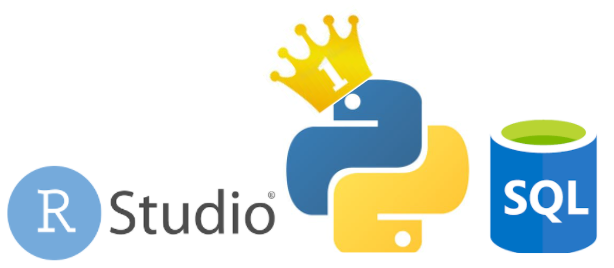
<br>
<b><span style="color:#496595">As usual Python overruled R for all the designation.</span></b> The most favourite language is Python for students as we see on the Kaggle most of the notebooks are written in python there is a lot more resources available to learn python compared to R.<br>
Looks like the top 2 widely used languages by Data Scientists is Python and SQL and the least preferable is Swift language.<br>
Research scientists uses R and MATLAB more than Machine Learning engineers.

<h3><span style="font-size:30px; color:#496595;">3.4 Recommend an Langauge and Visualization</span> </h3>

Most of the common languages to start the journey in Data Science is Python, R, SQL and C,C++ which I learn too.

In [ ]:
# to create a treamap
df1_8 = df1[['Q5','Q8']].copy()
df1_8 = pd.DataFrame(df1_8['Q8'].value_counts()).reset_index() 

fig1 = px.treemap(df1_8, path=['index'],values='Q8', color_discrete_sequence=px.colors.qualitative.T10)
fig1.update_layout(height=350,  
                  title="<span style='font-size:37px; font-family:Times New Roman'>Recommending Langauges for DS</span><br>Most common used Languages are Python, R, SQL and C,C++",
                  margin=dict(t=80, b=30, l=60, r=60),                
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=20, color='#8a8d93', family="Times New Roman"),
                  font=dict(color='#8a8d93'))

# to create the most used visualization library
fig = go.Figure(go.Scatter(x=[0,1,2,0], y=[0,1,0,0], mode='lines',fill="toself", line=dict(color="#c6ccd8"),fillcolor='#c6ccd8'))
fig.add_shape(type="rect", x0=0, y0=-0.05, x1=0.7, y1=-1.5, line=dict(color="#c6ccd8"), fillcolor='#c6ccd8')
fig.add_shape(type="rect", x0=0.8, y0=-0.05, x1=1.3, y1=-1.5, line=dict(color="#c6ccd8"), fillcolor='#c6ccd8')
fig.add_shape(type="rect", x0=1.4, y0=-0.05, x1=1.7, y1=-1.5, line=dict(color="#c6ccd8"), fillcolor='#c6ccd8')
fig.add_shape(type="rect", x0=1.8, y0=-0.05, x1=2, y1=-1.5, line=dict(color="#c6ccd8"), fillcolor='#c6ccd8')

fig.update_yaxes(visible=False)
fig.update_xaxes(visible=False)
fig.add_annotation(dict(x=0.51, y=0.72, ax=0, ay=0, xref = "paper", yref = "paper", text= "Mostly used<br> Visualization"))
fig.add_annotation(dict(x=0.16, y=0.25, ax=0, ay=0, xref = "paper", yref = "paper", 
                        text= "  Matplotlib +<br>seaborn<br> <b>59%</b>"))
fig.add_annotation(dict(x=0.52, y=0.28, ax=0, ay=0, xref = "paper", yref = "paper", text= "Plotly <br> <b>13.8%</b>"))
fig.add_annotation(dict(x=0.78, y=0.28, ax=0, ay=0, xref = "paper", yref = "paper", text= '<span style="font-size:15px">Ggplot <br><b>10.5%</b></span>'))
fig.add_annotation(dict(x=0.95, y=0.28, ax=0, ay=0, xref = "paper", yref = "paper", text= "Oth<br>er"))
fig.update_layout(height=370, margin=dict(b=40,t=40,l=300,r=300), font_size=20,
                  plot_bgcolor='#333', paper_bgcolor='#333', hovermode=False
)

fig1.show()
fig.show()

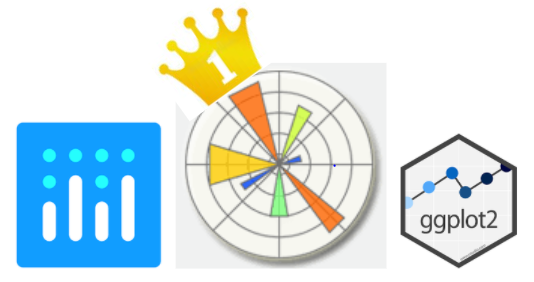
<br>
Python is the most popular language and most of the Data Scientist do recommend to learn it that will help the students to have grip on Data Manipulation. Some of the other language’s are recommended that are R, SQL, C, C++.<br><br>
Some of the famous visualization libraries are Matplotlib+Seaborn it never loses its charm now some interactive libraries are also coming in the picture my personal favourite Plotly. I am a huge fan of Plotly what not you can do with it.


<h3><span style="font-size:35px; color:#496595;">3.5 Enviroment and IDE's </span> </h3>

In [ ]:
import numpy as np

l_lst = ["Q9_Part_1", "Q9_Part_2", "Q9_Part_3", "Q9_Part_4", "Q9_Part_5", "Q9_Part_6",
                "Q9_Part_7", "Q9_Part_8", "Q9_Part_9", "Q9_Part_10"]
df1_copy = df_ns[['Q5',"Q9_Part_1", "Q9_Part_2", "Q9_Part_3", "Q9_Part_4", "Q9_Part_5", "Q9_Part_6",
                "Q9_Part_7", "Q9_Part_8", "Q9_Part_9", "Q9_Part_10"]]

# merging the data into one col 'Q9'
df1_copy=df1_copy.replace(np.NaN,'0')
df1_copy['Q9']=df1_copy[l_lst].apply(lambda row: ','.join(row.values.astype(str)), axis=1).fillna('')
df1_copy['Q9']=df1_copy['Q9'].str.replace('0,', '')
df1_copy['Q9']=df1_copy['Q9'].str.replace(',0', '')
df1_copy['Q9']=df1_copy['Q9'].str.replace('0', '')
# dropping the unwanted col
df1_copy.drop(df1_copy.columns[1:11], axis=1, inplace=True)
df1_copy = df1_copy.assign(Q9 = df1_copy['Q9'].str.split(',')).explode('Q9')
df1_copy['Counter']=1
df1_final = df1_copy.groupby(["Q9","Q5"])['Counter'].count().reset_index()
df1_final=df1_final.iloc[3: , :].set_index(['Q9','Q5'])
df1_final= round(df1_final / df1_final.groupby(level=1).sum()*100,2).reset_index()


fig = px.scatter(df1_final, x='Q9', y='Q5', size='Counter', color='Q5',
                 color_discrete_sequence=px.colors.qualitative.T10)
fig.update_xaxes(showgrid=False, zeroline=False, tickmode = 'array', 
                 tickvals=df1_final['Q9'].unique().tolist(),
                 ticktext=["Notepad++","Spyder","Sublime<br>Text","Vim/<br>Emacs","MATLAB",
                           "PyCharm","RStudio","Visual<br>Studio","Visual<br>Studio<br>Code","Jupyter"])
fig.update_yaxes(showgrid=False, ticksuffix='  ')
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(height=370, xaxis_title='', yaxis_title='', 
                  title="<span style='font-size:37px; font-family:Times New Roman'>Commonly used IDE's on Regular basis",
                  margin=dict(t=110, b=0, l=0, r=30),  showlegend=False,              
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Times New Roman"),
                  font=dict(color='#8a8d93'))                 
fig.show()

Students prefer Visual studio and MATLAB followed by sublime Text more than Jupyter.
Looks like <b><span style="color:#496595">jupyter has lost its charm for Data Scientist</span></b> as they used more Visual Studio rather than jupyter it's shocking for me. Machine Learning engineers prefer PyCharm and VS code.

In [ ]:
# data
df1['Q10'] = df1[df1.columns[34:49]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df10_copy = df1.assign(Q10=df1['Q10'].str.split(',')).explode('Q10')
df10_copy['Counter']=1
df_Q10 = df10_copy.groupby(["Q10","Q5"])['Counter'].count().reset_index().iloc[4: , :]
df_Q10 = df_Q10.replace([' Amazon EMR Notebooks ', ' Amazon Sagemaker Studio Notebooks ', ' Binder / JupyterHub ',
       ' Code Ocean ', ' Databricks Collaborative Notebooks ', ' Deepnote Notebooks ', ' IBM Watson Studio ', 
       ' Kaggle Notebooks', ' Observable Notebooks ', ' Paperspace / Gradient ', ' Zeppelin / Zepl Notebooks ', 
       'Azure Notebooks', 'Colab Notebooks', 'Google Cloud Datalab', 'Google Cloud Notebooks (AI Platform / Vertex AI) '],
       ['Amazon EMR NB', 'Amazon Sagemaker Studio NB', 'Binder / JupyterHub', 'Code Ocean', 'Databricks Collaborative NB',
        ' Deepnote NB', 'IBM Watson Studio ', 'Kaggle NB', 'Observable NB', ' Paperspace / Gradient',
       'Zeppelin / Zepl NB', 'Azure NB', 'Colab NB', 'Google Cloud Datalab', 'Google Cloud NB'])


fig = px.histogram(df_Q10, x='Counter', y='Q10', color='Q5', barnorm='percent',
                  color_discrete_sequence=['#334668','#496595','#6D83AA','#91A2BF'])
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, ticksuffix='  ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=500, xaxis_title='', yaxis_title='', 
                  barmode='stack', barnorm='percent',
                  title_y=0.8,
                  title="<span style='font-size:37px; font-family:Times New Roman'>Mostly used hosted NB Products on<br>Regular basis",
                  margin=dict(t=150, b=0, l=0, r=30),  showlegend=True,              
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Times New Roman"),
                  font=dict(color='#8a8d93'),
                  legend=dict(title="", orientation="h", yanchor="bottom", xanchor="center", x=0.5,y=1.02,
                              bordercolor="#fff", borderwidth=0.3, font_size=11))                 
fig.show()

Hosted notebooks are the best notebooks to work on without any problem related to environment additionally they do provide an easy share platform or easily collaborate platform from where we can share our result with ease. For example, personally I am not a fan of R but Kaggle provide a R environment where I can easily work and share coding immediately without any environmental setup.<br>
Kaggle and Colab Notebooks is preferred by everyone with 26% and 32% respectively. Students preferred kaggle+collab notebooks but there is a quite a number in Google cloud Datalab while Data Scientist prefers more Zeppeline and Databricks Collaborative Notebooks. ML engineers looks more observable and code ocean notebooks well Research scientist uses more observable notebooks and binder notebooks.

<h3><span style="font-size:35px; color:#496595;">3.6 Secert Ingridents </span> </h3>

In [ ]:
df_ns_11 = df_ns['Q11'].value_counts().reset_index()[:-2]
df1_11 = df1['Q11'].value_counts().reset_index()[:-2]

fig = make_subplots(rows=1, cols=2, vertical_spacing=1, specs=[[{"type": "pie"},{"type": "pie"}]],
                    subplot_titles=("With students<br>", "Without students<br>"))

fig.add_trace(go.Pie(values=df1_11['Q11'], labels=df1_11['index'], 
                     marker_colors=['#4c78a8','f58518','#e45756','#72b7b2'],
                     hole=0.7, rotation=340,
                     hoverinfo='label+percent+value', textinfo='label'), 
                    row=1, col=1)
fig.add_trace(go.Pie(values=df_ns_11['Q11'], labels=df_ns_11['index'], 
                     marker_colors=['#4c78a8','f58518','#e45756','#72b7b2'],
                     hole=0.7, rotation=30,
                     hoverinfo='label+percent+value', textinfo='label'), 
                    row=1, col=2)
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending')
fig.update_xaxes(visible=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=350,  
                  title="<span style='font-size:42px; font-family:Times New Roman'>Commonly Used Computing Platform</span>",
                  margin=dict(t=110, b=10, l=0, r=40),  showlegend=False,              
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  font=dict(color='#8a8d93'),
                  title_font=dict(size=30, color='#8a8d93', family="Lato, sans-serif"))        
fig.show()

In [ ]:
# question 12
df_q12 = df_ns[[i for i in df1.columns if 'Q12' in i]]
unique_count = []
for i in df_q12.columns:
    unique_count.append([df_q12[i].value_counts().index[0], df_q12[i].count()])
    
df_q12 = pd.DataFrame(unique_count, columns=["Hardware","Count"])
df_q12.loc[2] = df_q12.loc[2]+df_q12.loc[3]
df_q12 = df_q12.drop(3)
df_q12 = df_q12.replace({"Hardware": {' NVIDIA GPUs ':'GPUs', ' Google Cloud TPUs ':'TPU', 
                                      ' AWS Trainium Chips  AWS Inferentia Chips ':'AWS Chips'}})

# question 13
df_13_5 = pd.crosstab(df_ns["Q13"], df_ns["Q5"]).reset_index()
df_13_5 = df_13_5.replace('More than 25 times', '>25')

# chart
fig = make_subplots(rows=1, cols=2, vertical_spacing=1, specs=[[{"type": "pie"},{"type": "bar"}]],
                    column_widths=[0.4, 0.6], 
                    subplot_titles=("Most used Hardware<br>", "Demand of TPUs<br>"))

fig.add_trace(go.Bar(x=df_13_5['Data Scientist'], y=df_13_5['Q13'], marker_color='#334668',
                     name='Data Scientist', orientation='h'), 
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_13_5['Machine Learning Engineer'], y=df_13_5['Q13'], marker_color='#496595',
                     name='ML Engineer', orientation='h'), 
                     row=1, col=2)
fig.add_trace(go.Bar(x=df_13_5['Research Scientist'], y=df_13_5['Q13'], marker_color='#6D83AA',
                     name='Research Scientist', orientation='h'), 
                     row=1, col=2)
fig.add_trace(go.Pie(values=df_q12['Count'], labels=df_q12['Hardware'], name='Hardware',
                     marker_colors=['#4c78a8','f58518','#e45756','#72b7b2'],
                     hole=0.7, rotation=90, showlegend=False, 
                     hoverinfo='label+percent+value', textinfo='label'), 
                     row=1, col=1)

# styling
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending')
fig.update_xaxes(visible=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=360,  yaxis_title='', barmode='stack',
                  margin=dict(t=70, b=40, l=0, r=70),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  font=dict(color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.88, y=0.25,
                              bordercolor="#fff", borderwidth=0.5, font_size=12))
fig.show()

The Hardware<br>
There is a relative smaller percentage of use for Cloud Platforms and Deep Learning Workstations and an increase in Personal Laptop's.<br>
Well, the ratio of students to other profession is much higher that can be the reason as students might now have encountered such a problem where they will need high heavy equipment’s like GPU or TPU.<br>
Now, if we see on the second pie chart well it is noticed that there is quite an increment in the heavy equipment’s as the roles are of Data Science, Machine Learning Engineers and Research Scientist.

<h3><span style="color:#496595">Summary</span></h3>
Looks like most of the Data Scientist have just started their journey as 28% response are from Data Scientist having experience from 1-3 Years. Most of the DS and ML have 1-3 years of experience whereas RS have 5-10 years of experience.<br>
As usual python overruled R and the most common recommended languages are Python, SQL & R while for the visualization it is Matplotlib+Seaborn, Plotly and ggplot. Plotly is gaining the recognition in data visualization field.<br>
The most regular used IDEs are PyCharm & VS Code<br>
Kaggle+Collab Notebooks are most preferred but for the induvial DS prefers more Zeppeline and Databricks Collaborative Notebooks while ML engineers looks more observable and code ocean notebooks well RS uses more observable notebooks and binder notebooks.<br>
There is a relative smaller percentage of use for Cloud Platforms and Deep Learning Workstations and an increase in Personal Laptop's. Well, the ratio of students to other profession is much higher that can be the reason as students might now have encountered such a problem where they will need high heavy equipment’s like GPU or TPU.

<h3><span style="font-size:35px; color:#496595;">4. Machine Learning  </span> </h3>

In [ ]:
df_c = round((pd.crosstab(df_ns['Q5'], df_ns['Q15'], margins=True, normalize='columns')*100),2).T.reset_index()[:-1]
df_c = df_c.replace(['I do not use machine learning methods', '20 or more years','Under 1 year'], ['Not Using','20+ years','<1 years'])
df_c = df_c.loc(axis=0)[7,8,0,2,4,5,6,1,3].reset_index()

trace2 = go.Scatter(y=df_c['Research Scientist'], x=df_c.Q15,  showlegend=True, 
                        text=df_c['Research Scientist'], name='Research Scientist', marker_color='#6D83AA')
trace3 = go.Scatter(y=df_c['Machine Learning Engineer'], x=df_c.Q15,  showlegend=True, 
                        name='Machine Learning Engineer', marker_color='#496595')
trace4 = go.Scatter(y=df_c['Data Scientist'], x=df_c.Q15,  showlegend=True, 
                         name='Data Scientist', marker_color='#334668')
data=[trace2,trace3,trace4]
fig = go.Figure(data = data)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.update_xaxes(showgrid=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=350, 
                  title="<span style='font-size:50px; font-family:Times New Roman'>Experience in ML Methods</span>",
                  margin=dict(t=100, b=80, l=90, r=50),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="h", yanchor="bottom", xanchor="center", x=0.5, y=-0.41,
                              bordercolor="#fff", borderwidth=0.5, font_size=13))
fig.show()

In [ ]:
# data
df1['Q16'] = df1[df1.columns[72:87]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df16_copy = df1.assign(Q16=df1['Q16'].str.split(',')).explode('Q16')
df16_copy['Counter']=1
df_Q16 = df16_copy.groupby(["Q16","Q5"])['Counter'].count().reset_index().iloc[4: , :]

fig = px.histogram(df_Q16, x='Counter', y='Q16', color='Q5', barnorm='percent',      
             color_discrete_sequence=['#334668','#496595','#6D83AA','#91A2BF'])
fig.update_yaxes(showgrid=False, ticksuffix='  ', categoryorder='total descending',)
fig.update_xaxes(zeroline=False, showgrid=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=450,  xaxis_title='', yaxis_title='', hovermode='y unified', 
                  barnorm='percent', bargap=0.3, 
                  title="<span style='font-size:39px; font-family:Times New Roman'>Commonly Used ML Frameworks</span><br>Most common ML frameworks are Sklearn, Tensorflow, Keras, Pytorch & Xgboost",
                  margin=dict(t=110, b=0, l=0, r=30),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=17, color='#8a8d93', family="Times New Roman"),
                  font=dict(color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.81, y=1.03, 
                              bordercolor="#fff", borderwidth=0.5, font_size=13))
fig.show()

In [ ]:
# data
df1['Q17'] = df1[df1.columns[90:100]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df17_copy = df1.assign(Q17=df1['Q17'].str.split(',')).explode('Q17')
df17_copy['Counter']=1
df17_copy = df17_copy.groupby(["Q17","Q5"])['Counter'].count().reset_index().iloc[4: , :]

# chart
fig = px.scatter(df17_copy, x='Q17', y='Q5', size='Counter', color='Q5',
                 color_discrete_sequence=px.colors.qualitative.T10)
fig.update_xaxes(showgrid=False, zeroline=False, tickmode = 'array', 
                 tickvals=df17_copy['Q17'].unique().tolist(),
                 ticktext=["Bayesian<br>Approaches", "Convoluti<br>-onsl<br>NN", "Decision<br>Tree<br>Random<br> Forest", 
                           "Dense<br>NN", "Evoluti<br>-onary<br>Approaches", "GAN",
                           "Gradient<br>Boosting","Linear/<br>Logistic<br>Regression","RNN"])
fig.update_yaxes(showgrid=False, ticksuffix='  ')
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(height=400, xaxis_title='', yaxis_title='', 
                  title="<span style='font-size:37px; font-family:Times New Roman'>Commonly used ML Algorithms",
                  margin=dict(t=110, b=50, l=0, r=30),  showlegend=False,              
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Times New Roman"),
                  font=dict(color='#8a8d93'))                 
fig.show()

<h3><span style="font-size:35px; color:#496595;"> Computer vision & NLP Methods  </span> </h3>

In [ ]:
# data
df1['Q18'] = df1[df1.columns[103:108]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df18_copy = df1.assign(Q18=df1['Q18'].str.split(',')).explode('Q18')
df18_copy['Counter']=1
df18_copy = df18_copy.groupby(["Q18","Q5"])['Counter'].count().reset_index().sort_values(by='Counter', ascending=True)

# chart
fig = px.histogram(df18_copy, y='Q18', x='Counter', color='Q5', barnorm='percent',
                   color_discrete_sequence=['#91A2BF','#334668','#496595','#6D83AA'])
fig.update_yaxes(showgrid=False, categoryorder='total descending', ticksuffix='  ', tickmode = 'array', 
                 tickvals=df18_copy['Q18'].unique().tolist(),
                 ticktext=['Image Classification ',
                           'Image Segmentation ', 'Object Detection ',
                           'Image/Video Tools ', 'None ', 'Generative Network '])
fig.update_xaxes(showgrid=False, zeroline=False, categoryorder='total ascending')
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=370, xaxis_title='', yaxis_title='', hovermode='y unified',
                  title="<span style='font-size:36px; font-family:Times New Roman'>Commonly used Computer Vision Methods<br></span>Highly used CV method is Image classification with <b>28.5%</b>",
                  margin=dict(t=110, b=30, l=100, r=0),              
                  title_font=dict(size=17, color='#8a8d93', family="Times New Roman"),
                  font=dict(color='#8a8d93'),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.815, y=1, 
                              bordercolor="#fff", borderwidth=0.5, font_size=12))
fig.show()

In [ ]:
# data
df1['Q19'] = df1[df1.columns[109:114]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df19_copy = df1.assign(Q19=df1['Q19'].str.split(',')).explode('Q19')
df19_copy['Counter']=1
df19_copy = df19_copy.groupby(["Q19","Q5"])['Counter'].count().reset_index()[4:].sort_values(by='Counter', ascending=True)

# chart
fig = px.scatter(df19_copy, x='Q19', y='Q5', size='Counter', color='Q5',
                 color_discrete_sequence=px.colors.qualitative.T10)
fig.update_yaxes(showgrid=False, ticksuffix='  ', categoryorder='total ascending',)
fig.update_xaxes(showgrid=False, ticksuffix='  ', categoryorder='total descending', tickmode = 'array', 
                 tickvals=["Word Embeddings"," Transformer language Models","Encoder-Decorder Models",
                            "None","Contextualized Embeddings"],
                 ticktext=["Word<br>Embedding","Transformer<br>Language<br>Models","Encoder-<br>Decoder<br>Models",
                            "None","Contextualized<br>Embeddings"])
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(height=350, xaxis_title='', yaxis_title='', width=800,
                  title="<span style='font-size:40px; font-family:Times New Roman'>Commonly used NLP Methods<br></span>Highly used NLP method is Word Embedding with <b>29%</b>",
                  margin=dict(t=110, b=20, l=230, r=100),  showlegend=False,              
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=18, color='#8a8d93', family="Times New Roman"),
                  font=dict(color='#8a8d93'))                 
fig.show()

<h2><span style="color:#496595;">ML Summary</span></h2><br>
<b><span style="font-size:20px; color:#496595;">ML Methods Summary</span></b> <br>
Most of the Data Scientist have experience in the range of 4-10 years and the highest experience is 5-10 years with 57% in ML methods while the Machine Learning Engineers have the highest 3-4 years of experience in ML methods with 22%. <br>
It looks like Data Scientist have the highest experience from 4 to 20+ years while the Machine Learning Engineers have the highest experience from 2 to 5 years. Research Scientist experience increases from 3 years.<br>
Most of the students have no experience or 1-2 years of experience in ML methods<br><br>

<b><span style="font-size:20px; color:#496595;">ML Frameworks Summary</span></b> <br>
Most common Machine Learning Frameworks are Sklearn, Tensorflow, Keras, Pytorch & Xgboost.<br>
Favourite ML Frameworks for Data Scientist are Prophets, H203, Caret and the least favourite is PyTorch while Machine Learning Engineers most favourite is Huggingface, MXNet, PyTorch Lightning and least is Tidymodels and Caret<br>
Tidymodels and Caret are the choice of Research Scientist while keras and Pytorch are widely used by students.
<br>

<b><span style="font-size:20px; color:#496595;">ML Algorithm Summary</span></b> <br>
Commonly used algorithms are Regression algo like Logistic, Linear and Tree based algorithm like Decision tree, Random Forest.

<b><span style="font-size:20px; color:#496595;">CV & NLP Summary</span></b> <br>
Advanced methods like computer Vision methods or NLP methods needs expertise and experience to apply on the problem. Widely used CV method is Image classification and General Networks and for NLP method is Word embeddings/vectors 
<br>
Till now we saw the most common ML Algorithm’s, Framework’s which Data scientist, ML and Research Scientist used and some advanced methods like CV and NLP too. Let's now see what are the most common tools that Data professional use to track their experiment.

<h3><span style="font-size:35px; color:#496595;"> Tracking ML experiements  </span> </h3>

In [ ]:
# data
df_ns['Q38'] = df_ns[df_ns.columns[221:231]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df38_copy = df_ns.assign(Q38=df_ns['Q38'].str.split(',')).explode('Q38')
df38_copy['Counter']=1
df38_copy = df38_copy.groupby(["Q38","Q5"])['Counter'].count().reset_index().iloc[3: , :]

# chart
fig = px.histogram(df38_copy, y='Q38', x='Counter', color='Q5', barnorm='percent',
                   color_discrete_sequence=['#334668','#496595','#91A2BF'])
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, ticksuffix='  ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=450, xaxis_title='', yaxis_title='', 
                  barmode='stack', title_y=0.8,
                  title="<span style='font-size:50px; font-family:Times New Roman'>ML Tools for Experiement</span><br>Commonly used tools are TensorBord, MLFlow and Weights & Biases",
                  margin=dict(t=150, b=0, l=40, r=50),  showlegend=True,              
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=20, color='#8a8d93', family="Times New Roman"),
                  font=dict(color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.87, y=1.02,
                              bordercolor="#fff", borderwidth=0.3, font_size=11))                 
fig.show()

Nowadays, ML tracking tools are getting quite famous. Most common experiment tools are TensorBoard MLFlow, and Weights & Biases with 36.7%, 25% and 12.2% respectively. Looks, like DS and ML practitioners uses ML tools more.

<h3><span style="font-size:35px; color:#496595;">5. Company's Overview </span> </h3>

1. Currently Employee in which Industry
2. How big is the company
3. Machine Learning Practices of the company
4. Using Automated ML Tools

In [ ]:
df_5_20 = df1.groupby(['Q20','Q5'])['Counter'].sum().reset_index().sort_values(by='Counter', ascending=False)
df_5_20 = df_5_20[df_5_20['Q20']!='Other']


fig = px.scatter(df_5_20, y='Q20', x='Counter', color='Q5',
           color_discrete_sequence=px.colors.qualitative.T10)

fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_yaxes(gridcolor='grey', categoryorder='total ascending', ticksuffix='   ')
fig.update_xaxes(visible=False)
fig.update_layout(height=500, xaxis_title='', yaxis_title='', 
                  title="<span style='font-size:50px; font-family:Times New Roman'><b>Currently Employees</b></span><br>in which Industry?",
                  margin=dict(t=90, b=20, l=250, r=200),            
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=20, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.82, y=1, 
                              bordercolor="#fff", borderwidth=0.5, font_size=13))
fig.show() 

Looks like Research Scientist ruled the academics sector and entertainment sector has the least data professionals

In [ ]:
df_25 = pd.DataFrame({'Q25': ['0-2,999','3,000-9,999','10,000-24,999','25,000-49,999','50,000-99,999',
                              '100000-499999','500000-1000000', '>1,000,000'],
                      'Count': [2037, 654, 754, 252, 954, 733, 90, 19]})
fig = px.histogram(df_25, y='Count', x='Q25', histnorm='percent',
                   color_discrete_sequence=['#7787a5'])
fig.update_xaxes(showgrid=False)
fig.update_yaxes(visible=False)
fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(height=370, xaxis_title='', 
                  title="<span style='font-size:50px; font-family:Times New Roman'>Current yearly compensation</span><br>(approx $USD)?",
                  margin=dict(t=110, b=0, l=40, r=30),                
                  plot_bgcolor='#303030', paper_bgcolor='#303030',
                  title_font=dict(size=20, color='#8a8d93', family="Times New Roman"),
                  font=dict(size=12, color='#8a8d93'))                
fig.show()


Most of the employees are having 1-3 years of experience that why the yearly compensations have the huge value of 0 - $2999

In [ ]:
fig = px.histogram(df_ns, y='Q21', color='Q5', barnorm='percent',
                   color_discrete_sequence=['#91A2BF','#334668','#496595'])
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_yaxes(showgrid=False)
fig.update_xaxes(visible=False)
fig.update_layout(height=370, xaxis_title='', yaxis_title='', 
                  title="<span style='font-size:50px; font-family:Times New Roman'><b>Size of the Company</b></span><br>where you are employed</span>",
                  margin=dict(t=110, b=20, l=70, r=70),            
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=18, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.82, y=1.05, 
                              bordercolor="#fff", borderwidth=0.5, font_size=13))
fig.show() 

Most of the people works in small company having 0-49 employees and most of the Data Scientist are in company having 10,000+ employees and Research Scientist in 1000-9999 and ML in 0-49. Looks like some people are giving false information.

In [ ]:
# data
df_ml = df1.groupby(['Q23','Q5'])['Counter'].sum().reset_index()
df_ml =  df_ml.loc(axis=0)[6,7,8,0,1,2,3,4,5,15,16,17,9,10,11,12,13,14]

# chart
fig = px.scatter(df_ml, x='Q23', y='Counter', color='Q5', size='Counter',
                 color_discrete_sequence=['#334668','#496595','#6D83AA','#91A2BF'])

# styling
fig.update_yaxes(visible=False)
fig.update_xaxes(showgrid=False)
fig.update_xaxes(tickmode = 'array', 
                 tickvals=['I do not know', 'We are exploring ML methods (and may one day put a model into production)', 
                           'We recently started using ML methods (i.e., models in production for less than 2 years)',
                           'We have well established ML methods (i.e., models in production for more than 2 years)',
                           'We use ML methods for generating insights (but do not put working models into production)',
                           "No (we do not use ML methods)"],
                 ticktext=["I don't<br>know", 'Exploring<br>ML Models',  
                           'Models in<br>production<br><2 Years', 
                           'Models in<br>production<br>>2 Years',
                           'Use ML<br> generating<br> insights', "Don't use<br>ML methods"])
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=450, xaxis_title='', yaxis_title='', 
                  title="<span style='font-size:50px; font-family:Times New Roman'><b>Machine Learning </b><br>pratices of Company</span>",
                  margin=dict(t=110, b=40, l=110, r=110),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=30, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="h", yanchor="bottom", xanchor="center", x=0.5, y=-0.5,
                              bordercolor="#fff", borderwidth=0.5, font_size=13)
)
fig.show()

Most of the Data professional works in Educational, Technology, Finance industry. Data Scientist have the highest experience in putting models in production for more than 2 years.

In [ ]:
df_ns['Q37a'] = df_ns[df_ns.columns[213:219]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df37a_copy = df_ns.assign(Q37a=df_ns['Q37a'].str.split(',')).explode('Q37a')
df37a_copy['Counter']=1
df37a_copy = df37a_copy.groupby(["Q37a","Q5"])['Counter'].count().reset_index().iloc[3: , :]


fig = px.histogram(df37a_copy, y='Q37a', x='Counter', color='Q5', barnorm='percent',
                 color_discrete_sequence=['#334668','#496595','#6D83AA','#91A2BF'])
fig.update_yaxes(showgrid=False, ticksuffix='  ')
fig.update_xaxes(zeroline=False, showgrid=False)
fig.update_layout(height=370, xaxis_title='', yaxis_title='', 
                  title="<span style='font-size:50px; font-family:Times New Roman'><b>Using Automated ML Tools</span>",
                  margin=dict(t=110, b=10, l=70, r=70),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=20, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.78, y=1.05,
                              bordercolor="#fff", borderwidth=0.5, font_size=13)
)
fig.show()

In [ ]:
import plotly.graph_objects as go

categories = [' Analyze data<br> for business ',
               '  Build ML service<br> for products/worklfows ',
               '  Build the data<br> infrastructure ',
               '  Build ML prototypes <br> for new areas ',
               '  Research to<br> advance ML',
               '  Experimentation for<br> existing<br> ML models',
               '  None of these ']

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r = [16.5,11.4,12.47,19.6,33.3,18.6,43.9],
      theta=categories,
      fill='toself',
      name='Research Scientist'
))
fig.add_trace(go.Scatterpolar(
      r=[65.4,62,64.6,58.4,45,56,36],
      theta=categories,
      fill='toself',
      name='Data Scientist'
))
fig.add_trace(go.Scatterpolar(
      r=[17.9,26.75,22.8,21.9,22.1,25,20],
      theta=categories,
      fill='toself',
      name='Machine Learning Engineer'
))

fig.update_traces(marker=dict(line=dict(width=0)))
fig.update_layout(height=500, 
                  title="<span style='font-size:40px; font-family:Times New Roman'>Important part of role at work</span>",
                  margin=dict(t=120, b=60, l=0, r=0),              
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=18, color='#8a8d93', family="Times New Roman"),
                  font=dict(size=13, color='#8a8d93'),
                  polar=dict(radialaxis=dict(visible=True, range=[0, 66])),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.86, y=1.05, 
                              font_size=13))
fig.show()

Most of the DS role is to analyse the data which they used for business and the second priority is to build the data infrastructure while RS role is to research about the advanced ML algorithm like state of the art.
ML role is to build ML workflows to easy the process and the second priority is to do experiment in the ML models to gain more accuracy.

<h3><span style="font-size:35px; color:#496595;">Summary</span> </h3>
Top 5 sectors where data professional are more are Academics, Technology, finance, Medical & Manufacturing and least audience is from Entertainment sector<br>
Most of the people works in small company having 0-49 employees and most of the DS are in company having 10,000+ employees and RS in 1000-9999 and ML in 0-49. Looks like some people are giving false information.<br>
Well Data scientist have more experienced in production of ML models rather than ML engineers itself. Nowadays, company are adopting automated ML Tools.<br>
Most of the DS role is to analyse the data which they used for business and the second priority is to build the data infrastructure while RS role is to research about the advanced ML algorithm like state of the art.
ML role is to build ML workflows to easy the process and the second priority is to do experiment in the ML models to gain more accuracy
<br>

<h3><span style="font-size:35px; color:#496595;">6. Sharing Knowledge</span> </h3>

In [ ]:
df_ns['Q39'] = df_ns[df_ns.columns[233:242]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df39_copy = df_ns.assign(Q39=df_ns['Q39'].str.split(',')).explode('Q39')
df39_copy['Counter']=1
df39_copy = df39_copy.groupby(["Q39","Q5"])['Counter'].count().reset_index().iloc[3: , :]

fig = px.histogram(df39_copy, y='Q39', x='Counter', color='Q5', barnorm='percent',
                   color_discrete_sequence=['#334668','#496595','#91A2BF'])
fig.update_yaxes(showgrid=False, ticksuffix='  ')
fig.update_xaxes(zeroline=False, showgrid=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(height=450, xaxis_title='', yaxis_title='', 
                  title="<span style='font-size:50px; font-family:Times New Roman'><b>Sharing knowledge</b></span><br>on which platform?",
                  margin=dict(t=110, b=10, l=110, r=70),               
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=20, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(size=13, color='#8a8d93'),
                  legend=dict(title="", orientation="v", yanchor="bottom", xanchor="center", x=0.78, y=1.05,
                              bordercolor="#fff", borderwidth=0.5, font_size=13)
)
fig.show()

The most popular platform where data professionals share their work is GitHub and Kaggle with 33.3% and 19.9% while 17.5% don't like to share the work.<br>
Deep diving in the data; the DS professional like the streamlit and plotly Dash platform to showcase the work as we can interact with the data and we can have a conclusion to the problem while Machine Learning professional share their work on streamlit the most.<br>
Research Scientist don't share their work and if they do, they prefer colab and shiny platform.<br>
<span style="color:#496595;">**Personal note:**</span> I have also made a Dashboard in plotly Dash if you would like to see gave a look [here](https://www.linkedin.com/posts/kashish-rastogi-3a8b4119a_plotly-dataanalytics-datavisualization-activity-6816366816806354944-k2hT/)

**Refrences:**<br>
Inspiration for creating Top 10 Country:DS is taken from [here](https://www.behance.net/gallery/13484301/Infographic-series-Nutmeg)
<br>
For the Radar chart inspiration was taken from [here](https://www.kaggle.com/spitfire2nd/enthusiast-to-data-professional-what-changes)